In [1]:
# Mengimport library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    classification_report,
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import numpy
from sklearn.neural_network import MLPClassifier



In [2]:
# 1 Input
#  Mengimport data_normalizedset
data = pd.read_csv("kidney-disease.csv")

# Menampilkan data awal
print("Data awal".center(75, "="))
print(data.head())
print("=" * 75)

=================================Data awal=================================
     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


==========================Pengecekan missing value=========================
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64
Jumlah baris duplikat dalam dataset: 0
====================Data setelah menghapus missing value===================
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


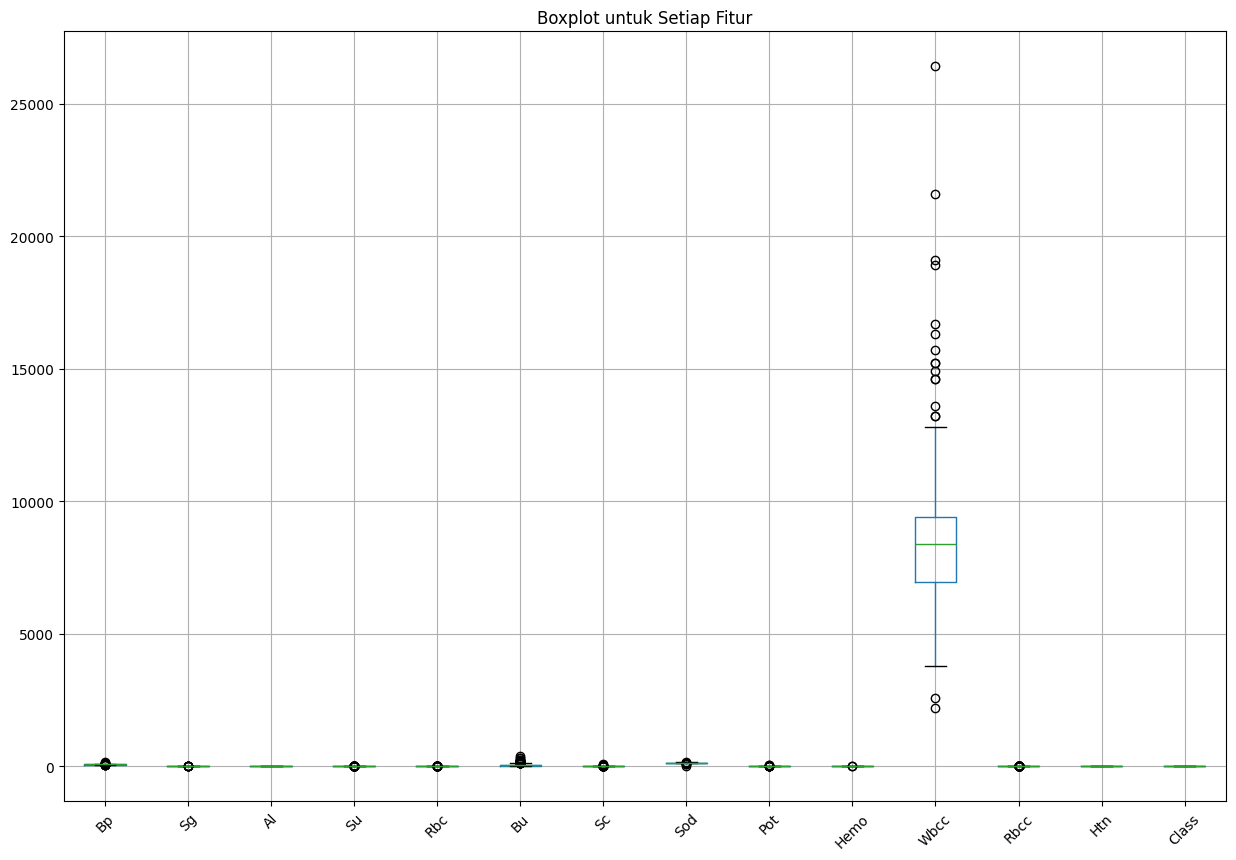

========================Data yang memiliki outlier:========================
        Bp     Sg   Al   Su  Rbc     Bu    Sc     Sod    Pot   Hemo     Wbcc  \
6     70.0  1.010  0.0  0.0  1.0   54.0  24.0  104.00   4.00  12.40   8406.0   
7     76.0  1.015  2.0  4.0  1.0   31.0   1.1  137.53   4.63  12.40   6900.0   
10    60.0  1.010  2.0  4.0  1.0   55.0   4.0  137.53   4.63   9.40   8406.0   
21    90.0  1.020  1.0  0.0  1.0  180.0  76.0    4.50   4.63  10.90   6200.0   
27    70.0  1.010  3.0  4.0  1.0   87.0   2.7  130.00   4.00  12.50   9600.0   
48    70.0  1.005  0.0  0.0  1.0   32.0   0.9  125.00   4.00  10.00  18900.0   
49    70.0  1.010  2.0  0.0  1.0   72.0   3.0  137.53   4.63   9.70  21600.0   
53    80.0  1.015  0.0  5.0  1.0   24.0   1.0  137.53   4.63  13.60   8500.0   
56    70.0  1.015  3.0  4.0  1.0  164.0   9.7  131.00   4.40  10.20  11300.0   
61    80.0  1.010  1.0  3.0  1.0  391.0  32.0  163.00  39.00  12.53   8406.0   
69    70.0  1.015  0.0  4.0  1.0   20.0   1.

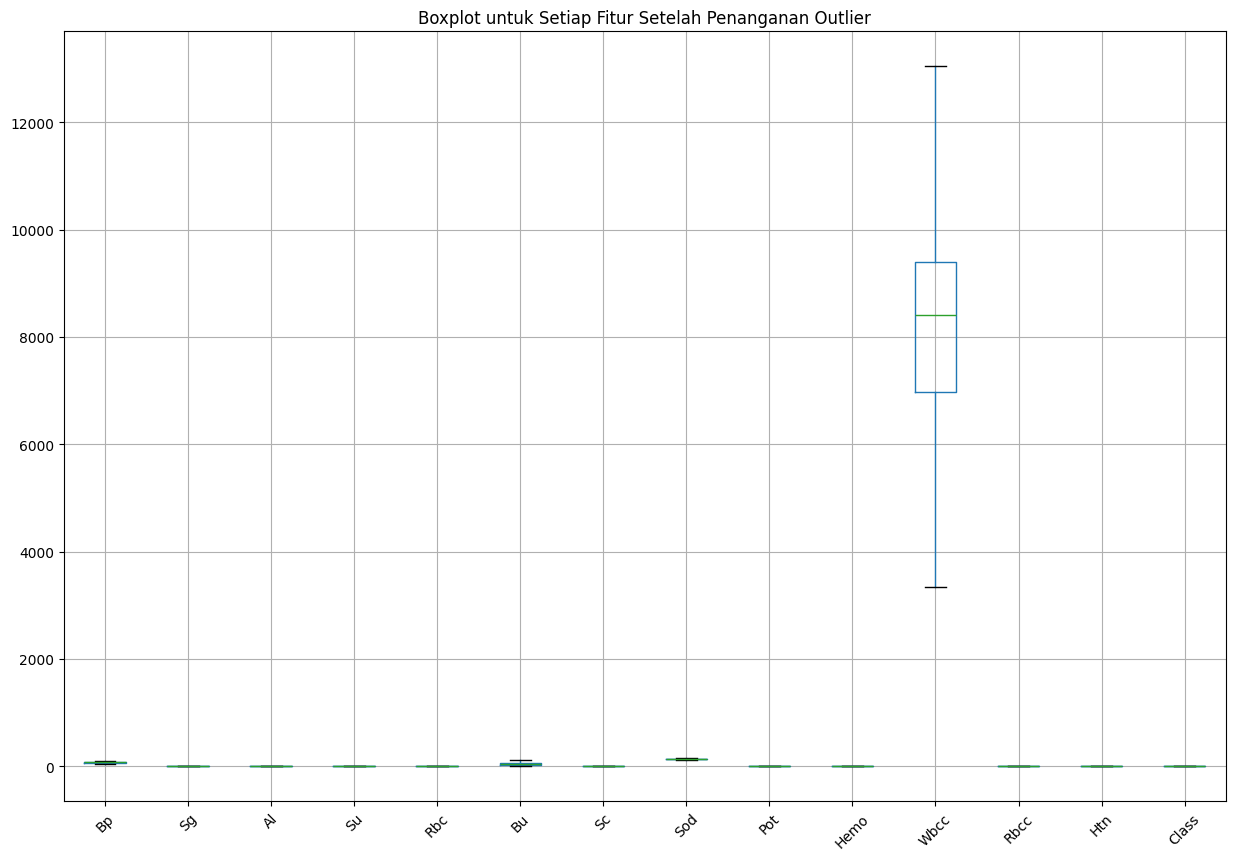

=======================Data setelah menangani outlier======================
     Bp      Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.0200  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  55.0  1.0200  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.0100  2.0  0.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.0075  4.0  0.0  1.0  56.0  3.8  126.00  2.80  11.2  6700.0  3.90   
4  80.0  1.0100  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0    1.0  
1  0.0    1.0  
2  0.0    1.0  
3  1.0    1.0  
4  0.0    1.0  


In [3]:
# 2 Prepocessing
# Pengecekan missing value
print("Pengecekan missing value".center(75, "="))
print(data.isnull().sum())
print("=" * 75)

# Memeriksa duplikat data
print("Jumlah baris duplikat dalam dataset:", data.duplicated().sum())

# Penanganan Missing value (Menghapus baris yang mengandung nilai null)
data.dropna(inplace=True)

# Menampilkan data setelah menghapus missing value
print("Data setelah menghapus missing value".center(75, "="))
print(data.isnull().sum())
print("=" * 75)

# Menampilkan boxplot untuk setiap fitur dalam dataset sebelum menangani outlier
plt.figure(figsize=(15, 10))
data.boxplot(rot=45)
plt.title("Boxplot untuk Setiap Fitur")
plt.show()

# Deteksi outliers dengan Z-score
z_scores = np.abs(stats.zscore(data._get_numeric_data()))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Menampilkan data yang memiliki outlier
print("Data yang memiliki outlier:".center(75, "="))
print(data[outliers])
print("=" * 75)

# Penanganan outliers dengan IQR (Interquartile Range)
for column in data._get_numeric_data().columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(
        data[column] < lower_bound,
        lower_bound,
        np.where(data[column] > upper_bound, upper_bound, data[column]),
    )

# Menampilkan boxplot untuk setiap fitur dalam dataset setelah penanganan outlier
plt.figure(figsize=(15, 10))
data.boxplot(rot=45)
plt.title("Boxplot untuk Setiap Fitur Setelah Penanganan Outlier")
plt.show()

# Menampilkan data setelah menangani outlier
print("Data setelah menangani outlier".center(75, "="))
print(data.head())
print("=" * 75)


In [4]:
# 3 Tansformasi
# Normalisasi data menggunakan Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data._get_numeric_data())

# Konstruksi DataFrame dari hasil normalisasi
data_normalized = pd.DataFrame(data_minmax, columns=data._get_numeric_data().columns)

# Menampilkan hasil normalisasi Min-Max Scaling
print("Hasil Normalisasi Min-Max Scaling".center(75, "="))
print(data_normalized.head())
print("=" * 75)

=====================Hasil Normalisasi Min-Max Scaling=====================
      Bp        Sg   Al   Su  Rbc        Bu        Sc       Sod       Pot  \
0  0.625  0.714286  0.2  0.0  0.0  0.307008  0.135021  0.480417  0.571875   
1  0.000  0.714286  0.8  0.0  0.0  0.146830  0.067511  0.480417  0.571875   
2  0.625  0.142857  0.4  0.0  0.0  0.458287  0.236287  0.480417  0.571875   
3  0.375  0.000000  0.8  0.0  0.0  0.484983  0.573840  0.000000  0.000000   
4  0.625  0.142857  0.4  0.0  0.0  0.218020  0.168776  0.480417  0.571875   

       Hemo      Wbcc      Rbcc  Htn  Class  
0  0.808765  0.460052  0.666667  1.0    1.0  
1  0.482072  0.274485  0.462500  0.0    1.0  
2  0.346614  0.429124  0.462500  0.0    1.0  
3  0.474104  0.346649  0.125000  1.0    1.0  
4  0.505976  0.408505  0.416667  0.0    1.0  


In [5]:
# 4 Seleksi Fitur
# -

In [6]:
# 5 Klasifikasi
# grouping yang dibagi menjadi dua
print("Grouping Variable".center(75, "="))
X = data_normalized.iloc[:, 0:-1].values
y = data_normalized.iloc[:, -1].values
y = np.where(y > 0, 1, 0)
print("Data Variable".center(75, "="))
print(X)
print("Data Kelas".center(75, "="))
print(y)
print("=============================================================================")


# Pembagian training dan testing
print("Splitting Data 20-80".center(75, "="))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Instance variable data training".center(75, "="))
print(X_train)
print("Instance kelas data training".center(75, "="))
print(y_train)
print("Instance variable data testing".center(75, "="))
print(X_test)
print("Instance kelas data testing".center(75, "="))
print(y_test)
print("=============================================================================")
print()

=============================Grouping Variable=============================
===============================Data Variable===============================
[[0.625      0.71428571 0.2        ... 0.46005155 0.66666667 1.        ]
 [0.         0.71428571 0.8        ... 0.27448454 0.4625     0.        ]
 [0.625      0.14285714 0.4        ... 0.42912371 0.4625     0.        ]
 ...
 [0.625      0.71428571 0.         ... 0.33634021 0.75       0.        ]
 [0.125      1.         0.         ... 0.39819588 0.95833333 0.        ]
 [0.625      1.         0.         ... 0.35695876 1.         0.        ]]
=================================Data Kelas================================
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [7]:
# Pemodelan Neural Network
clf = MLPClassifier(random_state=0, max_iter=700)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print(Y_pred)
print("=============================================================================")
print()

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 0]



=================CLASSIFICATION REPORT Neural Network PCA8=================
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Akurasi :  98.75 %
Sensitivity : 98.11320754716981
Specificity : 100.0

Confusion matrix for Neural Network PCA8
 [[27  1]
 [ 0 52]]


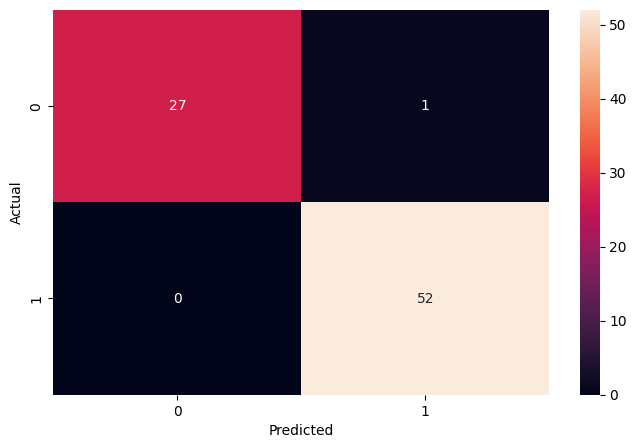

In [8]:
# 6 Evaluasi

print("CLASSIFICATION REPORT Neural Network No Feature Selection".center(75, "="))
# Menghitung akurasi
accuracy = accuracy_score(y_test, Y_pred)
# Menghitung presisi
precision = precision_score(y_test, Y_pred)
# Menampilkan precision, recall, f1-score, dan support
print(classification_report(y_test, Y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Menghitung sensitivity (true positive rate)
TN = cm[1][1] * 1.0
FN = cm[1][0] * 1.0
TP = cm[0][0] * 1.0
FP = cm[0][1] * 1.0
sens = TN / (TN + FP) * 100

# Menghitung specificity (true negative rate)
spec = TP / (TP + FN) * 100

print("Akurasi : ", accuracy * 100, "%")
print("Sensitivity : " + str(sens))
print("Specificity : " + str(spec))
print("============================================================")
print()

# Menampilkan confusion matrix
print("Confusion matrix for Neural Network No Feature Selection\n", cm)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("============================================================")
print()